In [1]:
%matplotlib inline

In [40]:
from matplotlib import pyplot as plt
import brightway2 as bw
from collections import Counter
import numpy as np
import pandas as pd

In [4]:
assert "ecoinvent 3.5 cutoff" in bw.databases
db = bw.Database("ecoinvent 3.5 cutoff")

Not interested in markets, just transforming activities

In [6]:
not_market = lambda x: 'market' not in x['name'].lower()
len(db), sum([1 for x in db if not_market(x)])

(16022, 10962)

Differentiate between electricity and others

In [7]:
is_electricity = lambda x: x['unit'] == 'kilowatt hour' and 'electricity' in x['name'].lower()
sum([1 for x in db if not_market(x) and is_electricity(x)])

2203

In [21]:
elec_counts = Counter()
other_counts = Counter()
all_counts = Counter()

In [22]:
for x in db:
    if not_market(x):
        all_counts[x['location']] += 1
        if is_electricity(x):
            elec_counts[x['location']] += 1
        else:
            other_counts[x['location']] += 1

In [12]:
elec_counts.most_common()

[('CH', 50),
 ('RoW', 45),
 ('DE', 31),
 ('FR', 25),
 ('RU', 24),
 ('ES', 24),
 ('US-WECC', 24),
 ('SE', 23),
 ('IT', 23),
 ('AT', 23),
 ('US-NPCC', 22),
 ('CZ', 22),
 ('TR', 22),
 ('GB', 22),
 ('FI', 22),
 ('CA-ON', 21),
 ('HU', 21),
 ('CA-NB', 21),
 ('JP', 21),
 ('NL', 21),
 ('CA-AB', 20),
 ('HR', 20),
 ('CA-QC', 20),
 ('ZA', 20),
 ('KR', 20),
 ('BE', 20),
 ('RO', 20),
 ('US-SERC', 20),
 ('US-RFC', 19),
 ('CA-MB', 19),
 ('GR', 19),
 ('UA', 19),
 ('PL', 19),
 ('MX', 19),
 ('PT', 19),
 ('CA-SK', 19),
 ('CA-NS', 19),
 ('BG', 19),
 ('BR', 18),
 ('SK', 18),
 ('US-TRE', 18),
 ('LT', 18),
 ('US-MRO', 18),
 ('TW', 17),
 ('NO', 17),
 ('US-FRCC', 17),
 ('LV', 17),
 ('RS', 17),
 ('AU', 17),
 ('IE', 16),
 ('CA-BC', 16),
 ('SI', 16),
 ('US-HICC', 16),
 ('CN-GD', 16),
 ('US-SPP', 16),
 ('CA-PE', 15),
 ('CL', 15),
 ('CN-JS', 15),
 ('CA-NT', 15),
 ('LU', 15),
 ('DK', 14),
 ('IN-TN', 14),
 ('EE', 14),
 ('CN-ZJ', 14),
 ('CN-LN', 14),
 ('CN-SH', 14),
 ('US-ASCC', 14),
 ('ID', 13),
 ('CN-HB', 13),
 ('CN

In [13]:
other_counts.most_common()

[('RoW', 2821),
 ('CH', 1307),
 ('RER', 1197),
 ('GLO', 925),
 ('CA-QC', 356),
 ('Europe without Switzerland', 201),
 ('DE', 134),
 ('US', 115),
 ('CN', 82),
 ('FR', 60),
 ('SE', 52),
 ('BR', 49),
 ('RU', 47),
 ('NL', 45),
 ('PE', 44),
 ('ES', 43),
 ('IN', 41),
 ('IT', 40),
 ('ZA', 35),
 ('AU', 32),
 ('BE', 30),
 ('GB', 29),
 ('PL', 28),
 ('TR', 28),
 ('AT', 28),
 ('HU', 26),
 ('RNA', 25),
 ('SK', 25),
 ('NO', 25),
 ('FI', 25),
 ('CA-AB', 23),
 ('CZ', 23),
 ('BG', 23),
 ('DK', 22),
 ('RLA', 20),
 ('UA', 19),
 ('KR', 19),
 ('ID', 18),
 ('MX', 18),
 ('MY', 17),
 ('TW', 17),
 ('HR', 17),
 ('PT', 17),
 ('RO', 16),
 ('GR', 15),
 ('IAI Area, EU27 & EFTA', 14),
 ('AR', 14),
 ('CA-NS', 13),
 ('TH', 13),
 ('CL', 13),
 ('CA-ON', 13),
 ('CA-PE', 13),
 ('LU', 13),
 ('RS', 12),
 ('EE', 12),
 ('LV', 12),
 ('IE', 11),
 ('JP', 11),
 ('CA-NB', 11),
 ('SI', 11),
 ('LT', 10),
 ('US-NPCC', 10),
 ('US-TRE', 10),
 ('US-WECC', 10),
 ('IR', 10),
 ('US-SERC', 10),
 ('US-FRCC', 10),
 ('US-RFC', 10),
 ('EC', 10)

In [23]:
order = [x[0] for x in all_counts.most_common()]

In [24]:
elec = [elec_counts[x] for x in order]
other = [other_counts[x] for x in order]

In [54]:
cum_total = np.cumsum([x[1] for x in all_counts.most_common()]) / np.sum([x[1] for x in all_counts.most_common()])

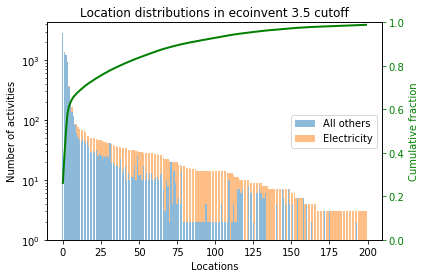

In [67]:
N = 200  # len(order)
ind = np.arange(N)  
width = 0.8

fig, ax = plt.subplots()

p1 = ax.bar(ind, other[:N], width, alpha=0.5)
p2 = ax.bar(ind, elec[:N], width, bottom=other[:N], alpha=0.5)
ax.set_yscale("log", nonposy='clip')

plt.ylabel('Number of activities')
plt.xlabel("Locations")
plt.title("Location distributions in ecoinvent 3.5 cutoff")

ax2 = ax.twinx()
p3 = ax2.plot(np.arange(N), cum_total[:N], 'g', lw=2)
ax2.set_ylabel('Cumulative fraction', color='g')
ax2.set_ylim([0, 1])
ax2.tick_params('y', colors='g')

plt.legend((p1[0], p2[0]), ('All others', 'Electricity'), loc="center right")
plt.savefig("ecoinvent-locations.png", dpi=300)